In [1]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

print(nth_prime(400))

2741


In [1]:
def get_all_newforms_at_level(level, expansion_terms=30, output_file=None):
    """
    Get ALL weight 2 rational newforms at a specific level.
    Only takes one curve per isogeny class (since they give the same newform).
    """
    from sage.databases.cremona import CremonaDatabase
    import time
    
    start_time = time.time()
    db = CremonaDatabase()
    
    rational_forms = []
    
    print(f"Weight 2 rational newforms at level {level}")
    print(f"Computing {expansion_terms} terms\n")
    
    # Open output file if specified
    if output_file:
        f_out = open(output_file, 'w')
    
    try:
        curves = db.allcurves(level)
        
        if curves:
            # Group by isogeny class (the letter part)
            isogeny_classes = {}
            for label in curves.keys():
                # Extract the letter (isogeny class identifier)
                letter = ''.join([c for c in label if c.isalpha()])
                if letter not in isogeny_classes:
                    isogeny_classes[letter] = label
            
            print(f"Found {len(isogeny_classes)} distinct newforms (isogeny classes)\n")
            
            # Process one curve per isogeny class
            for letter in sorted(isogeny_classes.keys()):
                label = isogeny_classes[letter]
                full_label = f"{level}{label}"
                E = EllipticCurve(full_label)
                rational_forms.append((level, 2, E))
                
                # Print header to console
                print(f"\n{'='*70}")
                print(f"Newform {len(rational_forms)}: Isogeny class {level}{letter}")
                print(f"Representative curve: {full_label}")
                print(f"{'='*70}")
                
                # Get coefficients
                an_list = E.anlist(expansion_terms + 1)
                coeffs = an_list[1:]
                
                # Write to file
                if output_file:
                    f_out.write(f"Isogeny class: {level}{letter}\n")
                    f_out.write(f"Representative curve: {full_label}\n")
                    f_out.write(f"Coefficients a_1 to a_{expansion_terms}:\n")
                    f_out.write(str(coeffs) + "\n\n")
                
                # Show first 10 coefficients to console
                print(f"Coefficients (first 10 of {expansion_terms}):")
                print(f"  a_1-a_10: {coeffs[:10]}")
                
                # Additional info
                print(f"\nCurve info:")
                print(f"  Conductor: {E.conductor()}")
                print(f"  Rank: {E.rank()}")
                
                if output_file:
                    f_out.write(f"Conductor: {E.conductor()}\n")
                    f_out.write(f"Rank: {E.rank()}\n")
                    f_out.write(f"{'='*70}\n\n")
    
    except Exception as e:
        print(f"Error at level {level}: {e}")
    
    if output_file:
        f_out.close()
        print(f"\nFull data written to: {output_file}")
    
    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"Found {len(rational_forms)} distinct newforms in {elapsed:.2f} seconds")
    print(f"{'='*70}")
    
    return rational_forms


results = get_all_newforms_at_level(
    level=11,
    expansion_terms=2800,
    output_file="/Users/barrybrent/data2/run20feb26no13.txt"
)

Weight 2 rational newforms at level 11
Computing 2800 terms

Found 1 distinct newforms (isogeny classes)


Newform 1: Isogeny class 11a
Representative curve: 11a1
Coefficients (first 10 of 2800):
  a_1-a_10: [1, -2, -1, 2, 1, 2, -2, 0, -2, -2]

Curve info:
  Conductor: 11
  Rank: 0

Full data written to: /Users/barrybrent/data2/run20feb26no13.txt

Found 1 distinct newforms in 1.10 seconds


In [5]:
import pickle
# loads all forms at a given level one at a time converted to lists
def load_newforms_from_file(filename):
    """
    Load all newforms from a file and return them as a list of dictionaries.
    Each dictionary contains the label and coefficients.
    """
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split by the separator line
    blocks = content.split('='*70)
    
    newforms = []
    
    for block in blocks:
        if 'Isogeny class:' in block:
            lines = block.strip().split('\n')
            
            # Extract isogeny class
            isogeny_class = lines[0].replace('Isogeny class:', '').strip()
            
            # Extract representative curve
            rep_curve = lines[1].replace('Representative curve:', '').strip()
            
            # Find the coefficients line
            for i, line in enumerate(lines):
                if line.startswith('['):
                    coeffs = eval(line)
                    break
            
            newforms.append({
                'isogeny_class': isogeny_class,
                'representative': rep_curve,
                'coefficients': coeffs
            })
    
    return newforms

# Load all newforms
newforms = load_newforms_from_file("/Users/barrybrent/data2/run20feb26no13.txt")
print("curve 11a1")
print(f"Loaded {len(newforms)} newforms\n")
print("number of newforms:",len(newforms))
# Access them one at a time
for i, form in enumerate(newforms):
    print(f"Newform {i+1}:")
    print(f"  Isogeny class: {form['isogeny_class']}")
    print(f"  Representative: {form['representative']}")
    print(f"  First 10 coefficients: {form['coefficients'][:10]}")
    print(f"  Total coefficients: {len(form['coefficients'])}")
    print()

# Access individual newforms
newform_1 = newforms[0]['coefficients']  # First newform
#newform_2 = newforms[1]['coefficients']  # Second newform (if it exists)

print(f"Newform 1, coefficient of q^5: {newform_1[4]}")  # Remember: index 4 is a_5
print(newform_1[:10])

def curve_eleven_prime(n):
    return newform_1[nth_prime(n)]

curve_eleven_prime_list=[curve_eleven_prime(n) for n in range(1,401)]
with open('/Users/barrybrent/data2/run20feb26no14.txt', 'wb') as wfile:
    pickle.dump(curve_eleven_prime_list, wfile) 


curve 11a1
Loaded 1 newforms

number of newforms: 1
Newform 1:
  Isogeny class: 11a
  Representative: 11a1
  First 10 coefficients: [1, -2, -1, 2, 1, 2, -2, 0, -2, -2]
  Total coefficients: 2801

Newform 1, coefficient of q^5: 1
[1, -2, -1, 2, 1, 2, -2, 0, -2, -2]


In [6]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

with open('/Users/barrybrent/data2/run20feb26no14.txt', 'rb') as rfile:
    curve_eleven_prime_list = pickle.load(rfile)



h_list=[1]+curve_eleven_prime_list # h_0 = 1 required by the lemmas
j_list=[(0,1)] # first entry is just an offset. 
for n in range(1,401):# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r] 
    j_n=n*h_list[n]-sm
    print((n,j_n))
    j_list.append((n,j_n))
    
with open('/Users/barrybrent/data2/run20feb26no15.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) 

(1, -1)
(2, 3)
(3, 11)
(4, 7)
(5, -31)
(6, -45)
(7, 41)
(8, 223)
(9, 191)
(10, -457)
(11, -1211)
(12, -305)
(13, 3457)
(14, 5827)
(15, -3049)
(16, -23201)
(17, -22849)
(18, 42363)
(19, 133645)
(20, 51887)
(21, -357745)
(22, -671173)
(23, 208011)
(24, 2459215)
(25, 2796469)
(26, -3991465)
(27, -14650063)
(28, -7782481)
(29, 36287873)
(30, 76271915)
(31, -9526859)
(32, -259493441)
(33, -335151971)
(34, 364592747)
(35, 1595328641)
(36, 1073219311)
(37, -3633454391)
(38, -8585540865)
(39, -383766827)
(40, 27156833183)
(41, 39529490801)
(42, -31874118125)
(43, -172469671199)
(44, -140354623809)
(45, 358505703191)
(46, 958297609767)
(47, 194629372183)
(48, -2817150386945)
(49, -4600111335289)
(50, 2602247085743)
(51, 18509695599341)
(52, 17703729694255)
(53, -34751981164885)
(54, -106114995411021)
(55, -37509405686421)
(56, 289450693960959)
(57, 529138529058457)
(58, -187710397684489)
(59, -1971736600930215)
(60, -2174595531930865)
(61, 3294848252582683)
(62, 11661273387324991)
(63, 58129634

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


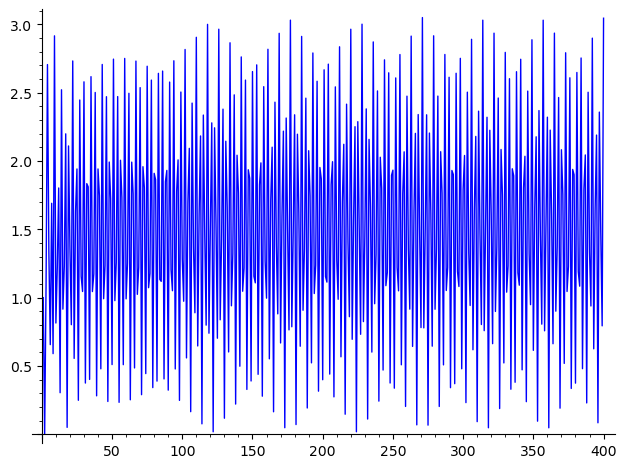

Data range: n = 1 to 400
Number of data points: 400
Min modulus range: 0.000000 to 3.050101

Polynomial trend coefficients: [-1.68202563e-06  9.46609795e-04  1.40912831e+00]
Detrended data std dev: 0.8717

TOP DOMINANT PERIODICITIES (in index n)
Rank   Period       Frequency    Power          
----------------------------------------------------------------------
1            2.68     0.372500       4.85e+04


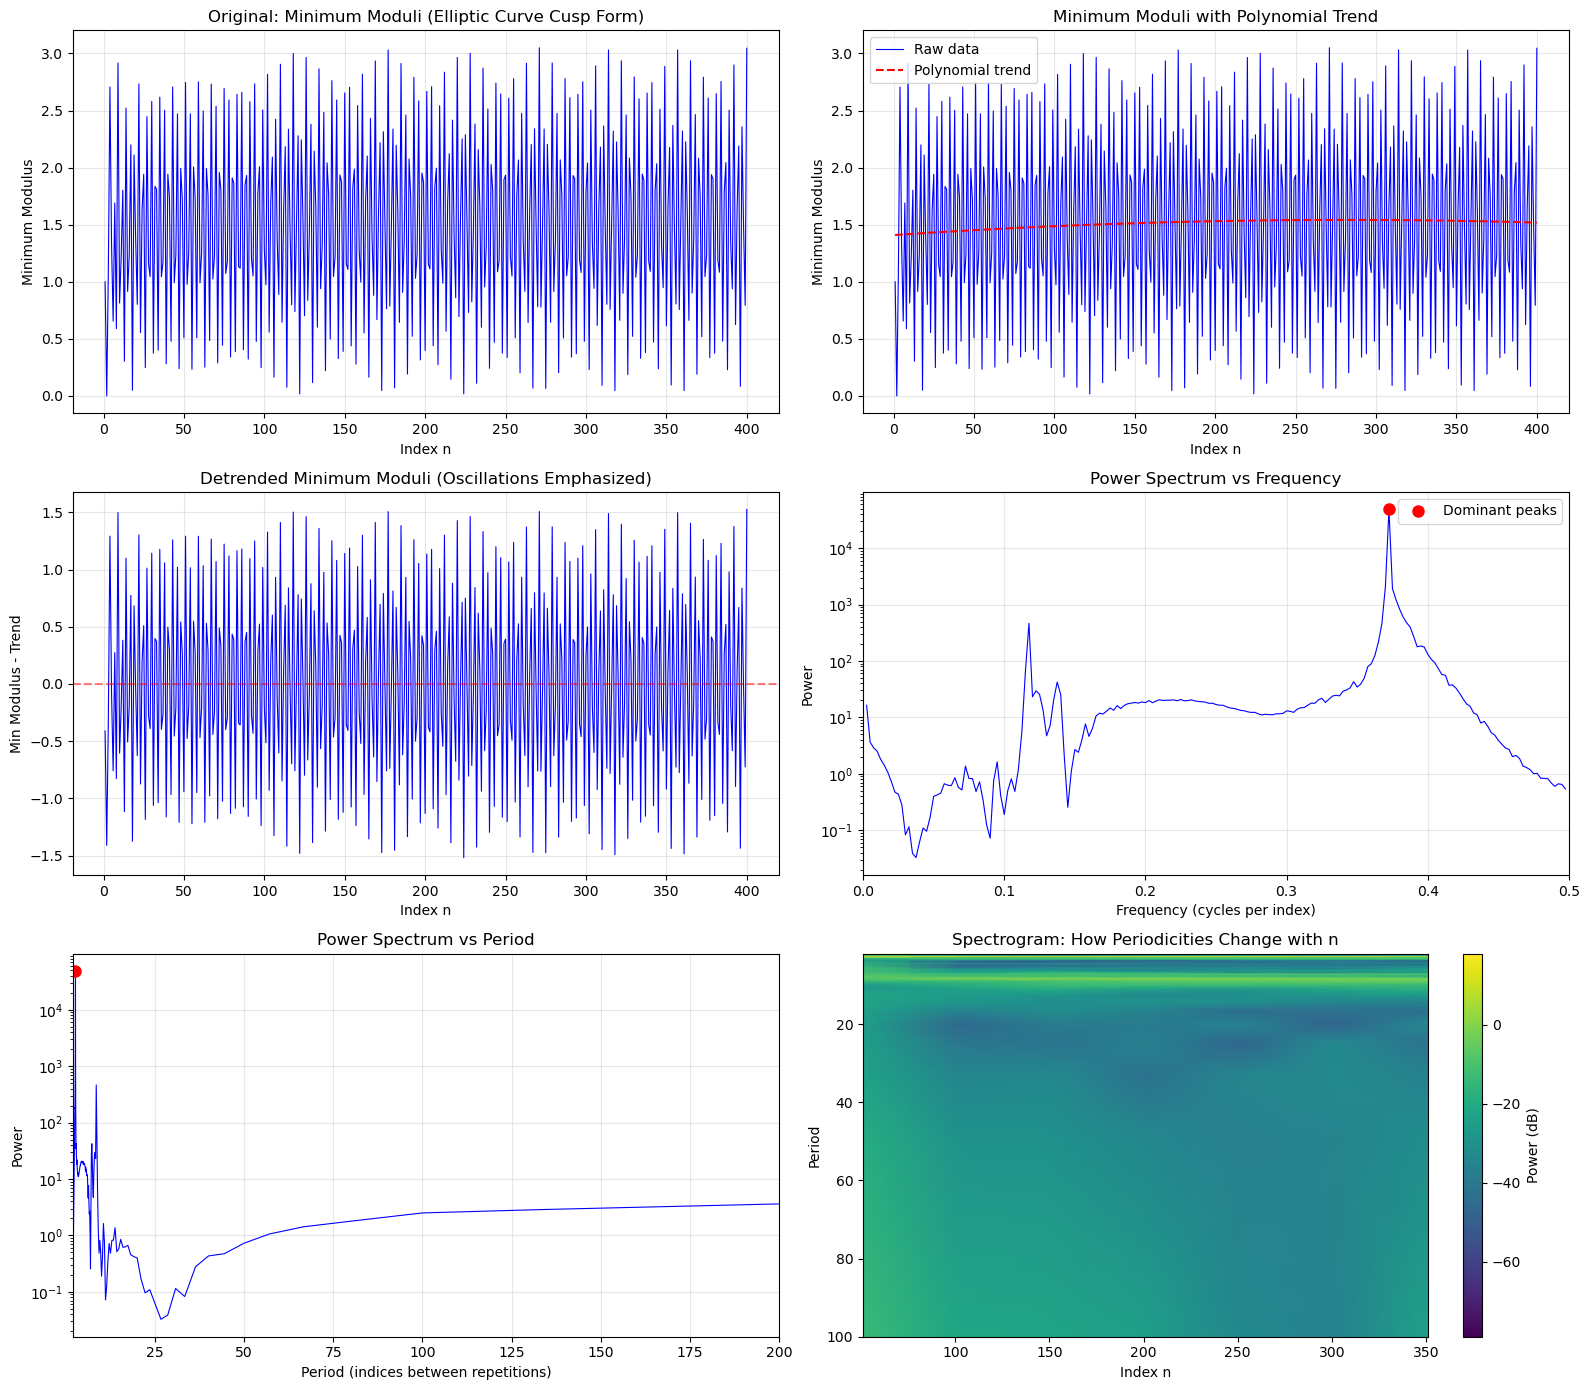


SIGNAL RECONSTRUCTION (using top 5 frequencies)
Component 1: Period = 2.68, Amplitude = 0.1145


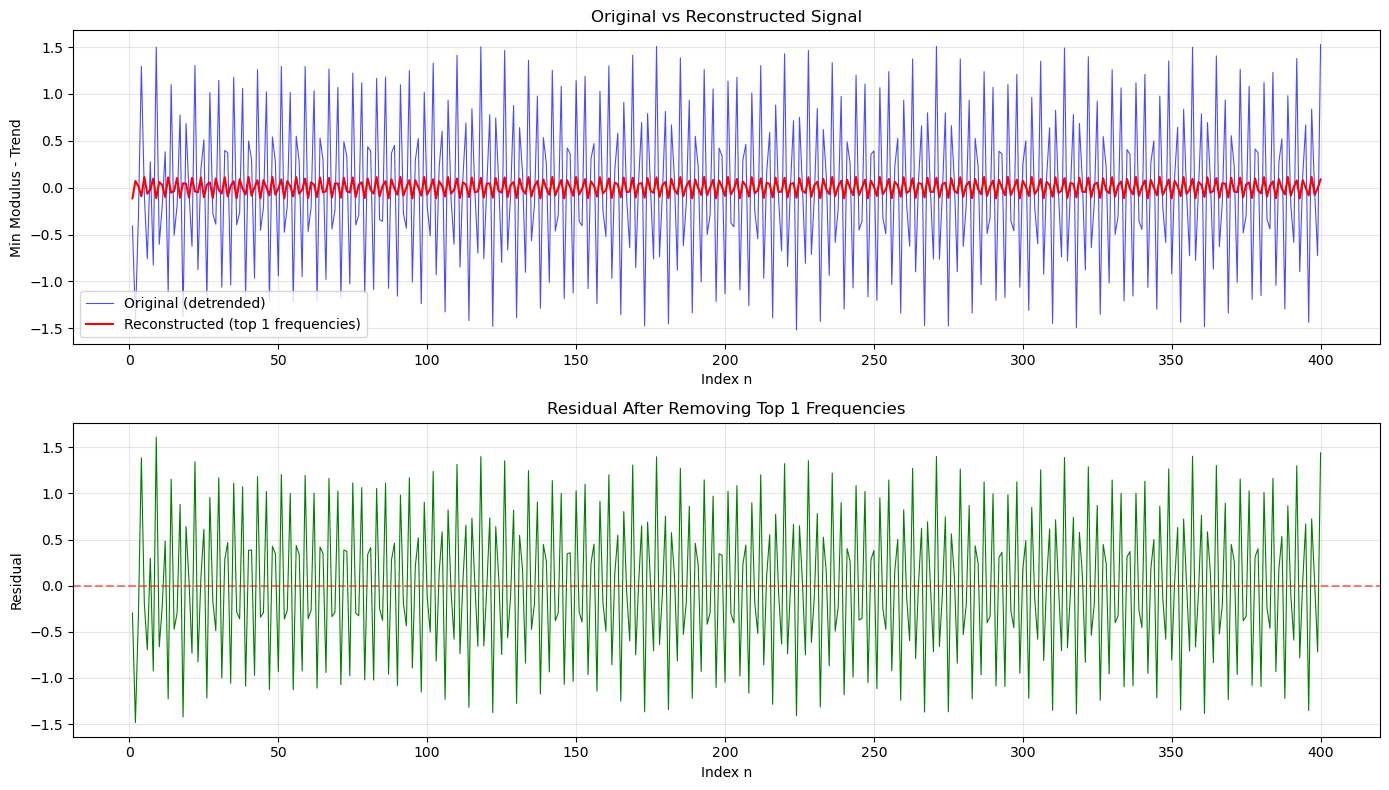


Analysis complete! Examine the plots and frequency table above.


In [2]:
import pickle
from sage.all import sigma, nth_prime
import ast


with open('/Users/barrybrent/data2/run20feb26no15.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)

charpol_list=[]
roots_list=[]

mins_list=[]

dets=[]

for n in range(1, 401):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))


p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()


with open('/Users/barrybrent/data2/run20feb26no16.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile)

with open('/Users/barrybrent/data2/run20feb26no17.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile)

with open('/Users/barrybrent/data2/run20feb26no18.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile)

with open('/Users/barrybrent/data2/run20feb26no19.txt', 'wb') as wfile:
    pickle.dump(dets, wfile)


# FOURIER ANALYSIS OF MINIMUM MODULI - Elliptic Curve Cusp Form
# This cell performs spectral analysis on the minimum moduli sequence
# to detect periodicities, dominant frequencies, and oscillatory patterns

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ==============================================================================
# 1. PREPARE THE DATA - Convert from SageMath to Python/NumPy types
# ==============================================================================

# Extract the data from mins_list and convert to Python floats
indices = np.array([float(pair[0]) for pair in mins_list], dtype=np.float64)
min_moduli = np.array([float(pair[1]) for pair in mins_list], dtype=np.float64)

print(f"Data range: n = {int(indices[0])} to {int(indices[-1])}")
print(f"Number of data points: {len(indices)}")
print(f"Min modulus range: {min_moduli.min():.6f} to {min_moduli.max():.6f}")

# ==============================================================================
# 2. DETRENDING (Important for seeing oscillations)
# ==============================================================================

# Remove polynomial trend (degree 2) from raw minimum moduli
poly_coeffs = np.polyfit(indices, min_moduli, deg=2)
poly_trend = np.polyval(poly_coeffs, indices)
detrended_poly = min_moduli - poly_trend

print(f"\nPolynomial trend coefficients: {poly_coeffs}")
print(f"Detrended data std dev: {np.std(detrended_poly):.4f}")

# ==============================================================================
# 3. COMPUTE FOURIER TRANSFORM
# ==============================================================================

# Use FFT on the detrended minimum moduli
fft_result = np.fft.fft(detrended_poly)
fft_frequencies = np.fft.fftfreq(len(indices), d=1.0)

# Power spectrum (magnitude squared)
power_spectrum = np.abs(fft_result)**2

# Only keep positive frequencies
positive_freq_mask = fft_frequencies > 0
frequencies = fft_frequencies[positive_freq_mask]
power = power_spectrum[positive_freq_mask]

# Convert frequency to period
periods = 1.0 / frequencies

# ==============================================================================
# 4. IDENTIFY DOMINANT FREQUENCIES
# ==============================================================================

peak_indices = signal.find_peaks(power, height=np.max(power)*0.05)[0]
peak_powers = power[peak_indices]
peak_periods = periods[peak_indices]

sorted_indices = np.argsort(peak_powers)[::-1]
top_peaks = sorted_indices[:min(15, len(sorted_indices))]

print("\n" + "="*70)
print("TOP DOMINANT PERIODICITIES (in index n)")
print("="*70)
print(f"{'Rank':<6} {'Period':<12} {'Frequency':<12} {'Power':<15}")
print("-"*70)
for rank, idx in enumerate(top_peaks, 1):
    period = peak_periods[idx]
    freq = frequencies[peak_indices[idx]]
    pwr = peak_powers[idx]
    print(f"{rank:<6} {period:>10.2f}   {freq:>10.6f}   {pwr:>12.2e}")

# ==============================================================================
# 5. VISUALIZATIONS
# ==============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Plot 5.1: Original data (linear scale)
axes[0, 0].plot(indices, min_moduli, 'b-', linewidth=0.8)
axes[0, 0].set_xlabel('Index n')
axes[0, 0].set_ylabel('Minimum Modulus')
axes[0, 0].set_title('Original: Minimum Moduli (Elliptic Curve Cusp Form)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 5.2: Polynomial trend overlaid on raw data
axes[0, 1].plot(indices, min_moduli, 'b-', linewidth=0.8, label='Raw data')
axes[0, 1].plot(indices, poly_trend, 'r--', linewidth=1.5, label='Polynomial trend')
axes[0, 1].set_xlabel('Index n')
axes[0, 1].set_ylabel('Minimum Modulus')
axes[0, 1].set_title('Minimum Moduli with Polynomial Trend')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 5.3: Detrended data (shows oscillations more clearly)
axes[1, 0].plot(indices, detrended_poly, 'b-', linewidth=0.8)
axes[1, 0].set_xlabel('Index n')
axes[1, 0].set_ylabel('Min Modulus - Trend')
axes[1, 0].set_title('Detrended Minimum Moduli (Oscillations Emphasized)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 5.4: Power Spectrum vs Frequency
axes[1, 1].semilogy(frequencies, power, 'b-', linewidth=0.8)
axes[1, 1].semilogy(frequencies[peak_indices[top_peaks]], 
                     peak_powers[top_peaks], 'ro', markersize=8, label='Dominant peaks')
axes[1, 1].set_xlabel('Frequency (cycles per index)')
axes[1, 1].set_ylabel('Power')
axes[1, 1].set_title('Power Spectrum vs Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, 0.5)

# Plot 5.5: Power Spectrum vs Period
max_period = len(indices) / 2
period_mask = periods <= max_period
axes[2, 0].semilogy(periods[period_mask], power[period_mask], 'b-', linewidth=0.8)
for idx in top_peaks:
    if peak_periods[idx] <= max_period:
        axes[2, 0].semilogy(peak_periods[idx], peak_powers[idx], 'ro', markersize=8)
axes[2, 0].set_xlabel('Period (indices between repetitions)')
axes[2, 0].set_ylabel('Power')
axes[2, 0].set_title('Power Spectrum vs Period')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim(2, max_period)

# Plot 5.6: Spectrogram
window_size = min(128, len(indices)//4)
f_spec, t_spec, Sxx = signal.spectrogram(detrended_poly, fs=1.0, 
                                          nperseg=window_size, 
                                          noverlap=window_size//2)
period_spec = 1.0 / (f_spec + 1e-10)
period_spec = period_spec[1:]
Sxx = Sxx[1:, :]

im = axes[2, 1].pcolormesh(indices[0] + t_spec, period_spec, 10*np.log10(Sxx + 1e-10),
                           shading='gouraud', cmap='viridis')
axes[2, 1].set_xlabel('Index n')
axes[2, 1].set_ylabel('Period')
axes[2, 1].set_title('Spectrogram: How Periodicities Change with n')
axes[2, 1].set_ylim(2, min(100, max_period))
axes[2, 1].invert_yaxis()
plt.colorbar(im, ax=axes[2, 1], label='Power (dB)')

plt.tight_layout()
plt.show()

# ==============================================================================
# 6. FILTERED SIGNAL (reconstruct using only dominant frequencies)
# ==============================================================================

print("\n" + "="*70)
print("SIGNAL RECONSTRUCTION (using top 5 frequencies)")
print("="*70)

reconstructed = np.zeros_like(detrended_poly)
num_components = min(5, len(top_peaks))
for rank, idx in enumerate(top_peaks[:num_components], 1):  
    freq = frequencies[peak_indices[idx]]
    period = peak_periods[idx]
    amp = np.abs(fft_result[peak_indices[idx]]) / len(indices)
    phase = np.angle(fft_result[peak_indices[idx]])
    component = amp * np.cos(2 * np.pi * freq * indices + phase)
    reconstructed += component
    print(f"Component {rank}: Period = {period:.2f}, Amplitude = {amp:.4f}")

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(indices, detrended_poly, 'b-', linewidth=0.8, alpha=0.7, label='Original (detrended)')
axes[0].plot(indices, reconstructed, 'r-', linewidth=1.5, label=f'Reconstructed (top {num_components} frequencies)')
axes[0].set_xlabel('Index n')
axes[0].set_ylabel('Min Modulus - Trend')
axes[0].set_title('Original vs Reconstructed Signal')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

residual = detrended_poly - reconstructed
axes[1].plot(indices, residual, 'g-', linewidth=0.8)
axes[1].set_xlabel('Index n')
axes[1].set_ylabel('Residual')
axes[1].set_title(f'Residual After Removing Top {num_components} Frequencies')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Analysis complete! Examine the plots and frequency table above.")
print("="*70)


In [2]:
import pickle
with open('/Users/barrybrent/data2/run20feb26no16.txt', 'rb') as rfile:
    mins_list = pickle.load(rfile)
print(mins_list[:3])

[(1, 1.0000000000000000000000000000), (2, 0.00000000000000000000000000000), (3, 1.0918531384607744242308976900)]


In [3]:
zeros=[]
for pair in mins_list:
    if abs(pair[1])<1/10**15:
        zeros.append(pair[0])
print(zeros)

[2]


Data range: n = 3 to 400
Number of data points: 398
Min modulus range: 0.018200 to 3.050101

Polynomial trend coefficients: [-8.05929940e-07  5.24312563e-04  1.45166066e+00]
Detrended data std dev: 0.8707

TOP DOMINANT PERIODICITIES (in index n)
Rank   Period       Frequency    Power          
----------------------------------------------------------------------
1            2.69     0.371859       3.64e+04


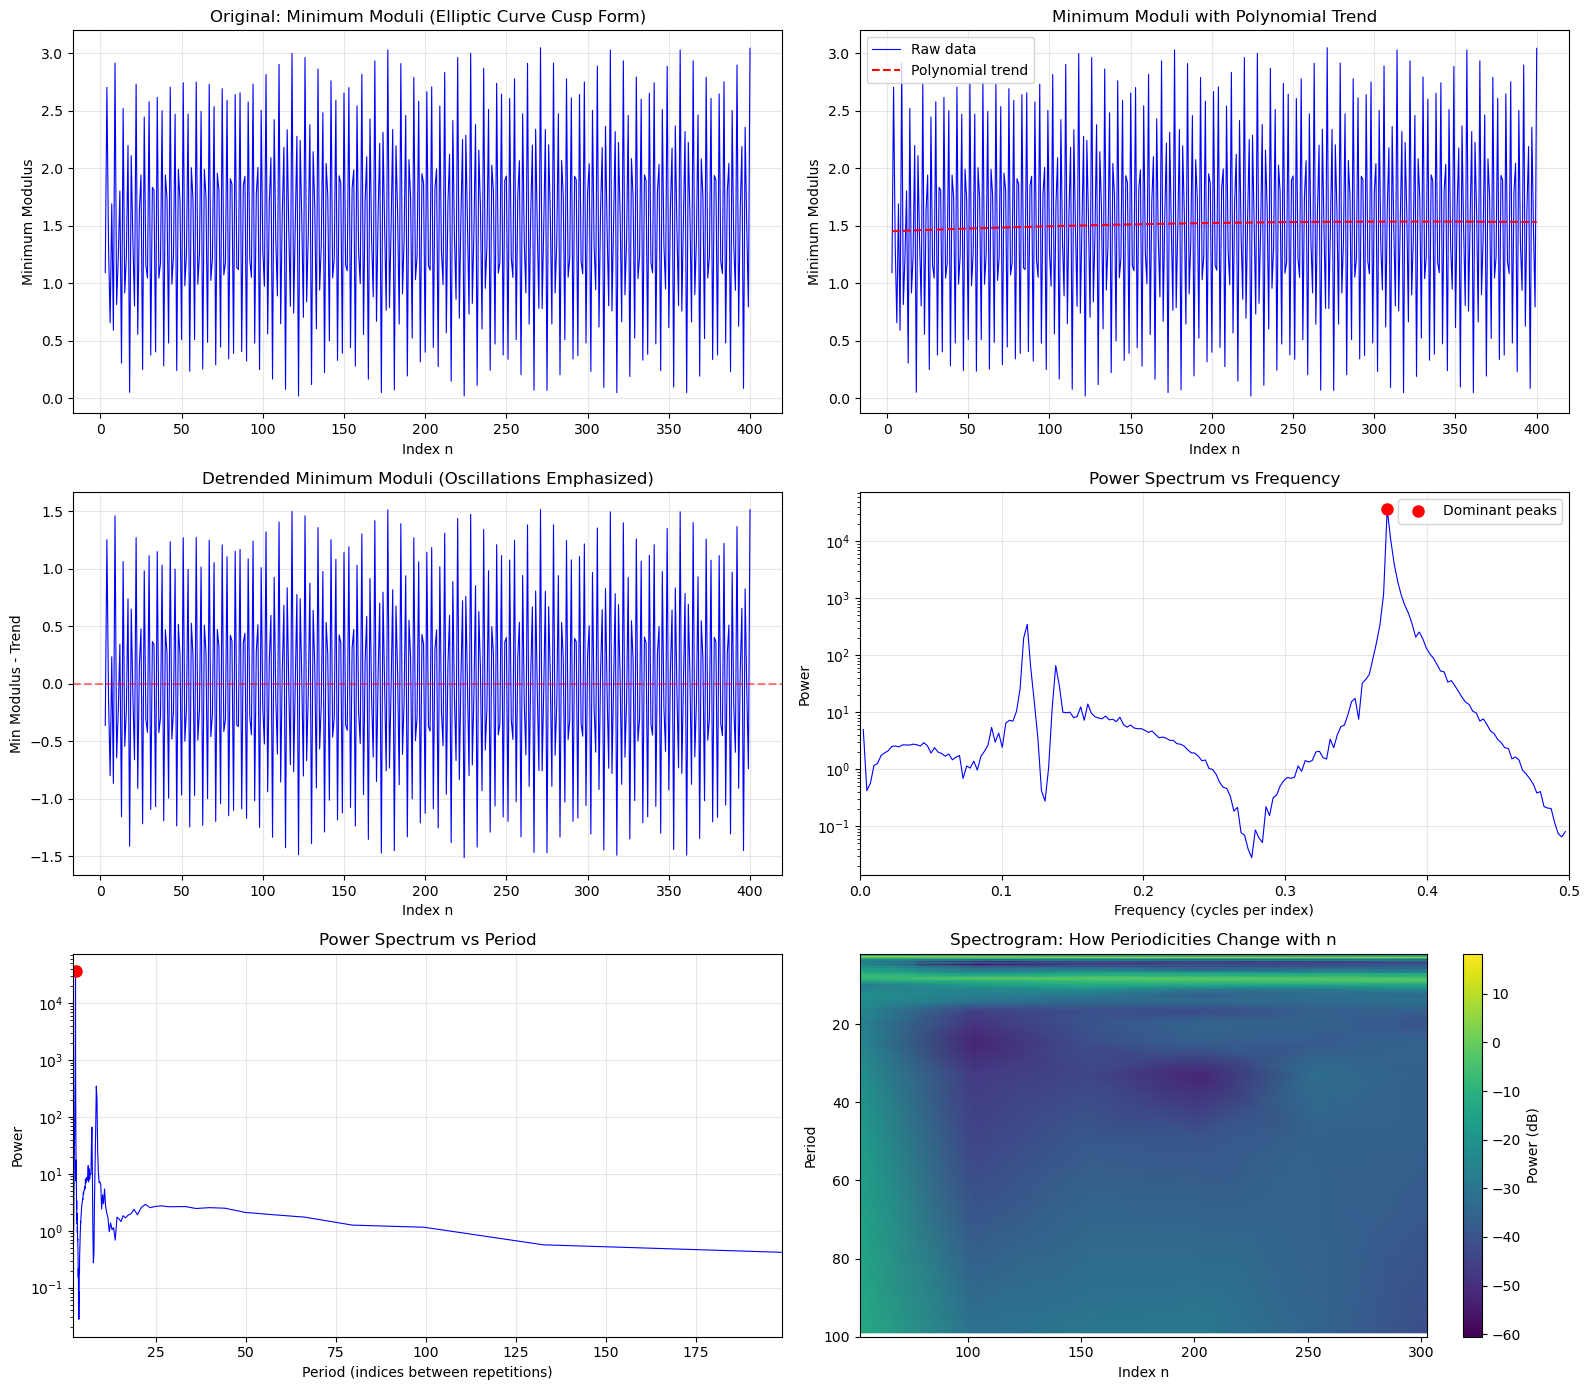


SIGNAL RECONSTRUCTION (using top 5 frequencies)
Component 1: Period = 2.69, Amplitude = 0.0870


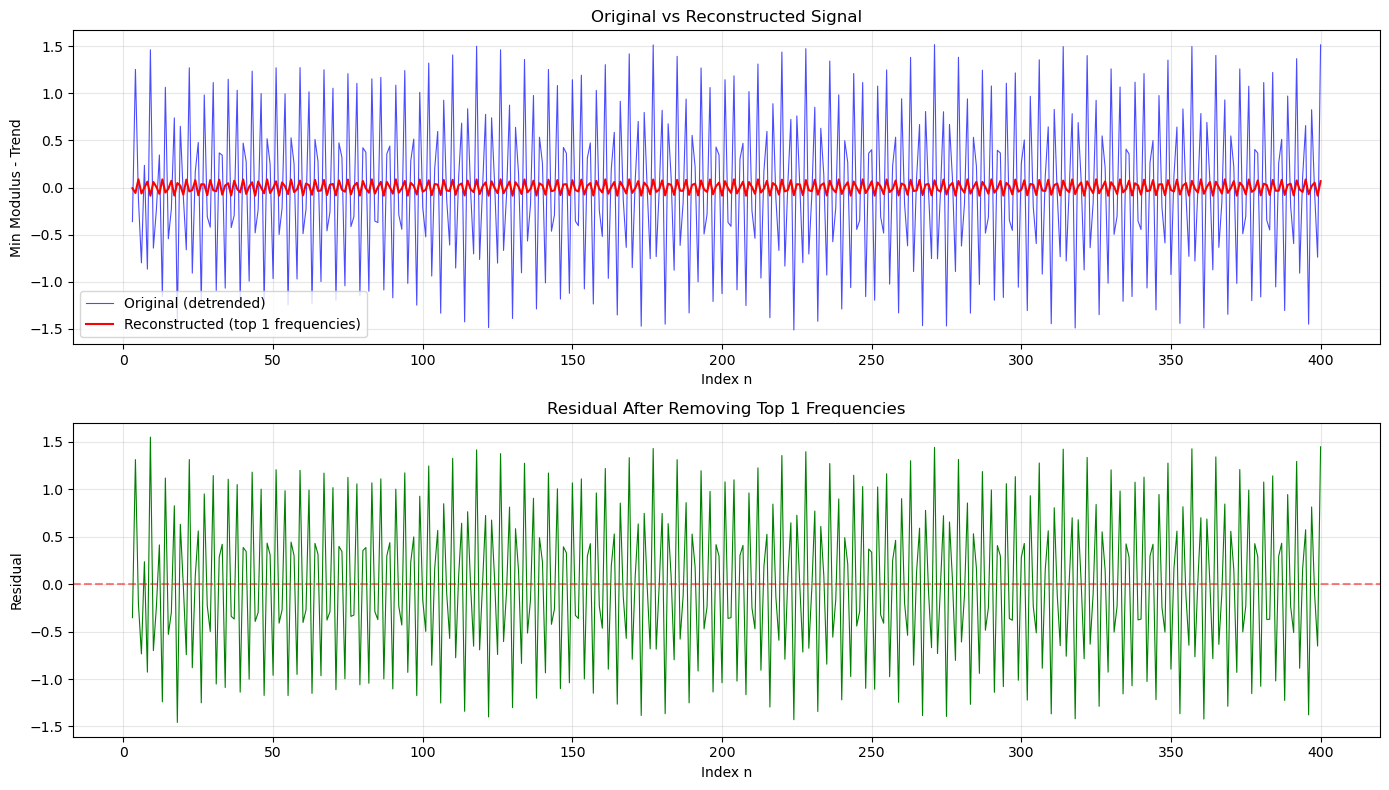


Analysis complete! Examine the plots and frequency table above.


In [4]:
# FOURIER ANALYSIS OF MINIMUM MODULI - Elliptic Curve Cusp Form
# This cell performs spectral analysis on the minimum moduli sequence
# to detect periodicities, dominant frequencies, and oscillatory patterns
# This code ignores the first two members of mins_list <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<,

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import pickle
with open('/Users/barrybrent/data2/run20feb26no16.txt', 'rb') as rfile:
    mins_list = pickle.load(rfile)

# ==============================================================================
# 1. PREPARE THE DATA - Convert from SageMath to Python/NumPy types
# ==============================================================================

# SKIP THE FIRST TWO MEMBERS OF mins_list
mins_list_filtered = mins_list[2:]

# Extract the data from mins_list and convert to Python floats
indices = np.array([float(pair[0]) for pair in mins_list_filtered], dtype=np.float64)
min_moduli = np.array([float(pair[1]) for pair in mins_list_filtered], dtype=np.float64)

print(f"Data range: n = {int(indices[0])} to {int(indices[-1])}")
print(f"Number of data points: {len(indices)}")
print(f"Min modulus range: {min_moduli.min():.6f} to {min_moduli.max():.6f}")

# ==============================================================================
# 2. DETRENDING (Important for seeing oscillations)
# ==============================================================================

# Remove polynomial trend (degree 2) from raw minimum moduli
poly_coeffs = np.polyfit(indices, min_moduli, deg=2)
poly_trend = np.polyval(poly_coeffs, indices)
detrended_poly = min_moduli - poly_trend

print(f"\nPolynomial trend coefficients: {poly_coeffs}")
print(f"Detrended data std dev: {np.std(detrended_poly):.4f}")

# ==============================================================================
# 3. COMPUTE FOURIER TRANSFORM
# ==============================================================================

# Use FFT on the detrended minimum moduli
fft_result = np.fft.fft(detrended_poly)
fft_frequencies = np.fft.fftfreq(len(indices), d=1.0)

# Power spectrum (magnitude squared)
power_spectrum = np.abs(fft_result)**2

# Only keep positive frequencies
positive_freq_mask = fft_frequencies > 0
frequencies = fft_frequencies[positive_freq_mask]
power = power_spectrum[positive_freq_mask]

# Convert frequency to period
periods = 1.0 / frequencies

# ==============================================================================
# 4. IDENTIFY DOMINANT FREQUENCIES
# ==============================================================================

peak_indices = signal.find_peaks(power, height=np.max(power)*0.05)[0]
peak_powers = power[peak_indices]
peak_periods = periods[peak_indices]

sorted_indices = np.argsort(peak_powers)[::-1]
top_peaks = sorted_indices[:min(15, len(sorted_indices))]

print("\n" + "="*70)
print("TOP DOMINANT PERIODICITIES (in index n)")
print("="*70)
print(f"{'Rank':<6} {'Period':<12} {'Frequency':<12} {'Power':<15}")
print("-"*70)
for rank, idx in enumerate(top_peaks, 1):
    period = peak_periods[idx]
    freq = frequencies[peak_indices[idx]]
    pwr = peak_powers[idx]
    print(f"{rank:<6} {period:>10.2f}   {freq:>10.6f}   {pwr:>12.2e}")

# ==============================================================================
# 5. VISUALIZATIONS
# ==============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Plot 5.1: Original data (linear scale)
axes[0, 0].plot(indices, min_moduli, 'b-', linewidth=0.8)
axes[0, 0].set_xlabel('Index n')
axes[0, 0].set_ylabel('Minimum Modulus')
axes[0, 0].set_title('Original: Minimum Moduli (Elliptic Curve Cusp Form)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 5.2: Polynomial trend overlaid on raw data
axes[0, 1].plot(indices, min_moduli, 'b-', linewidth=0.8, label='Raw data')
axes[0, 1].plot(indices, poly_trend, 'r--', linewidth=1.5, label='Polynomial trend')
axes[0, 1].set_xlabel('Index n')
axes[0, 1].set_ylabel('Minimum Modulus')
axes[0, 1].set_title('Minimum Moduli with Polynomial Trend')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 5.3: Detrended data (shows oscillations more clearly)
axes[1, 0].plot(indices, detrended_poly, 'b-', linewidth=0.8)
axes[1, 0].set_xlabel('Index n')
axes[1, 0].set_ylabel('Min Modulus - Trend')
axes[1, 0].set_title('Detrended Minimum Moduli (Oscillations Emphasized)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 5.4: Power Spectrum vs Frequency
axes[1, 1].semilogy(frequencies, power, 'b-', linewidth=0.8)
axes[1, 1].semilogy(frequencies[peak_indices[top_peaks]], 
                     peak_powers[top_peaks], 'ro', markersize=8, label='Dominant peaks')
axes[1, 1].set_xlabel('Frequency (cycles per index)')
axes[1, 1].set_ylabel('Power')
axes[1, 1].set_title('Power Spectrum vs Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, 0.5)

# Plot 5.5: Power Spectrum vs Period
max_period = len(indices) / 2
period_mask = periods <= max_period
axes[2, 0].semilogy(periods[period_mask], power[period_mask], 'b-', linewidth=0.8)
for idx in top_peaks:
    if peak_periods[idx] <= max_period:
        axes[2, 0].semilogy(peak_periods[idx], peak_powers[idx], 'ro', markersize=8)
axes[2, 0].set_xlabel('Period (indices between repetitions)')
axes[2, 0].set_ylabel('Power')
axes[2, 0].set_title('Power Spectrum vs Period')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim(2, max_period)

# Plot 5.6: Spectrogram
window_size = min(128, len(indices)//4)
f_spec, t_spec, Sxx = signal.spectrogram(detrended_poly, fs=1.0, 
                                          nperseg=window_size, 
                                          noverlap=window_size//2)
period_spec = 1.0 / (f_spec + 1e-10)
period_spec = period_spec[1:]
Sxx = Sxx[1:, :]

im = axes[2, 1].pcolormesh(indices[0] + t_spec, period_spec, 10*np.log10(Sxx + 1e-10),
                           shading='gouraud', cmap='viridis')
axes[2, 1].set_xlabel('Index n')
axes[2, 1].set_ylabel('Period')
axes[2, 1].set_title('Spectrogram: How Periodicities Change with n')
axes[2, 1].set_ylim(2, min(100, max_period))
axes[2, 1].invert_yaxis()
plt.colorbar(im, ax=axes[2, 1], label='Power (dB)')

plt.tight_layout()
plt.show()

# ==============================================================================
# 6. FILTERED SIGNAL (reconstruct using only dominant frequencies)
# ==============================================================================

print("\n" + "="*70)
print("SIGNAL RECONSTRUCTION (using top 5 frequencies)")
print("="*70)

reconstructed = np.zeros_like(detrended_poly)
num_components = min(5, len(top_peaks))
for rank, idx in enumerate(top_peaks[:num_components], 1):  
    freq = frequencies[peak_indices[idx]]
    period = peak_periods[idx]
    amp = np.abs(fft_result[peak_indices[idx]]) / len(indices)
    phase = np.angle(fft_result[peak_indices[idx]])
    component = amp * np.cos(2 * np.pi * freq * indices + phase)
    reconstructed += component
    print(f"Component {rank}: Period = {period:.2f}, Amplitude = {amp:.4f}")

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(indices, detrended_poly, 'b-', linewidth=0.8, alpha=0.7, label='Original (detrended)')
axes[0].plot(indices, reconstructed, 'r-', linewidth=1.5, label=f'Reconstructed (top {num_components} frequencies)')
axes[0].set_xlabel('Index n')
axes[0].set_ylabel('Min Modulus - Trend')
axes[0].set_title('Original vs Reconstructed Signal')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

residual = detrended_poly - reconstructed
axes[1].plot(indices, residual, 'g-', linewidth=0.8)
axes[1].set_xlabel('Index n')
axes[1].set_ylabel('Residual')
axes[1].set_title(f'Residual After Removing Top {num_components} Frequencies')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Analysis complete! Examine the plots and frequency table above.")
print("="*70)

Data range: n = 3 to 400
Number of data points: 398
Min modulus range: 0.018200 to 3.050101

Polynomial trend coefficients: [-8.05929940e-07  5.24312563e-04  1.45166066e+00]
Detrended data std dev: 0.8707

STANDARD FFT ANALYSIS (FULL DATASET)
Rank   Period       Frequency    Power          
----------------------------------------------------------------------
1            2.69     0.371859       3.64e+04

SPLIT DATASET ANALYSIS
Split point: n = 100 (index 97)
Early segment: n = 3 to 99 (97 points)
Late segment: n = 100 to 400 (301 points)

Early segment (n < 100):
  Dominant period: 2.62
  Dominant power: 1.27e+03

Late segment (n >= 100):
  Dominant period: 2.69
  Dominant power: 3.39e+04

Period ratio (late/early): 1.025
Power ratio (late/early): 26.589

SLIDING WINDOW FFT (TRACKING FREQUENCY EVOLUTION)
Number of windows analyzed: 32
Window width: 80 points
Step size: 10 points

AUTOCORRELATION ANALYSIS
Early segment: First autocorrelation peak at lag 3
Late segment: First autocorre

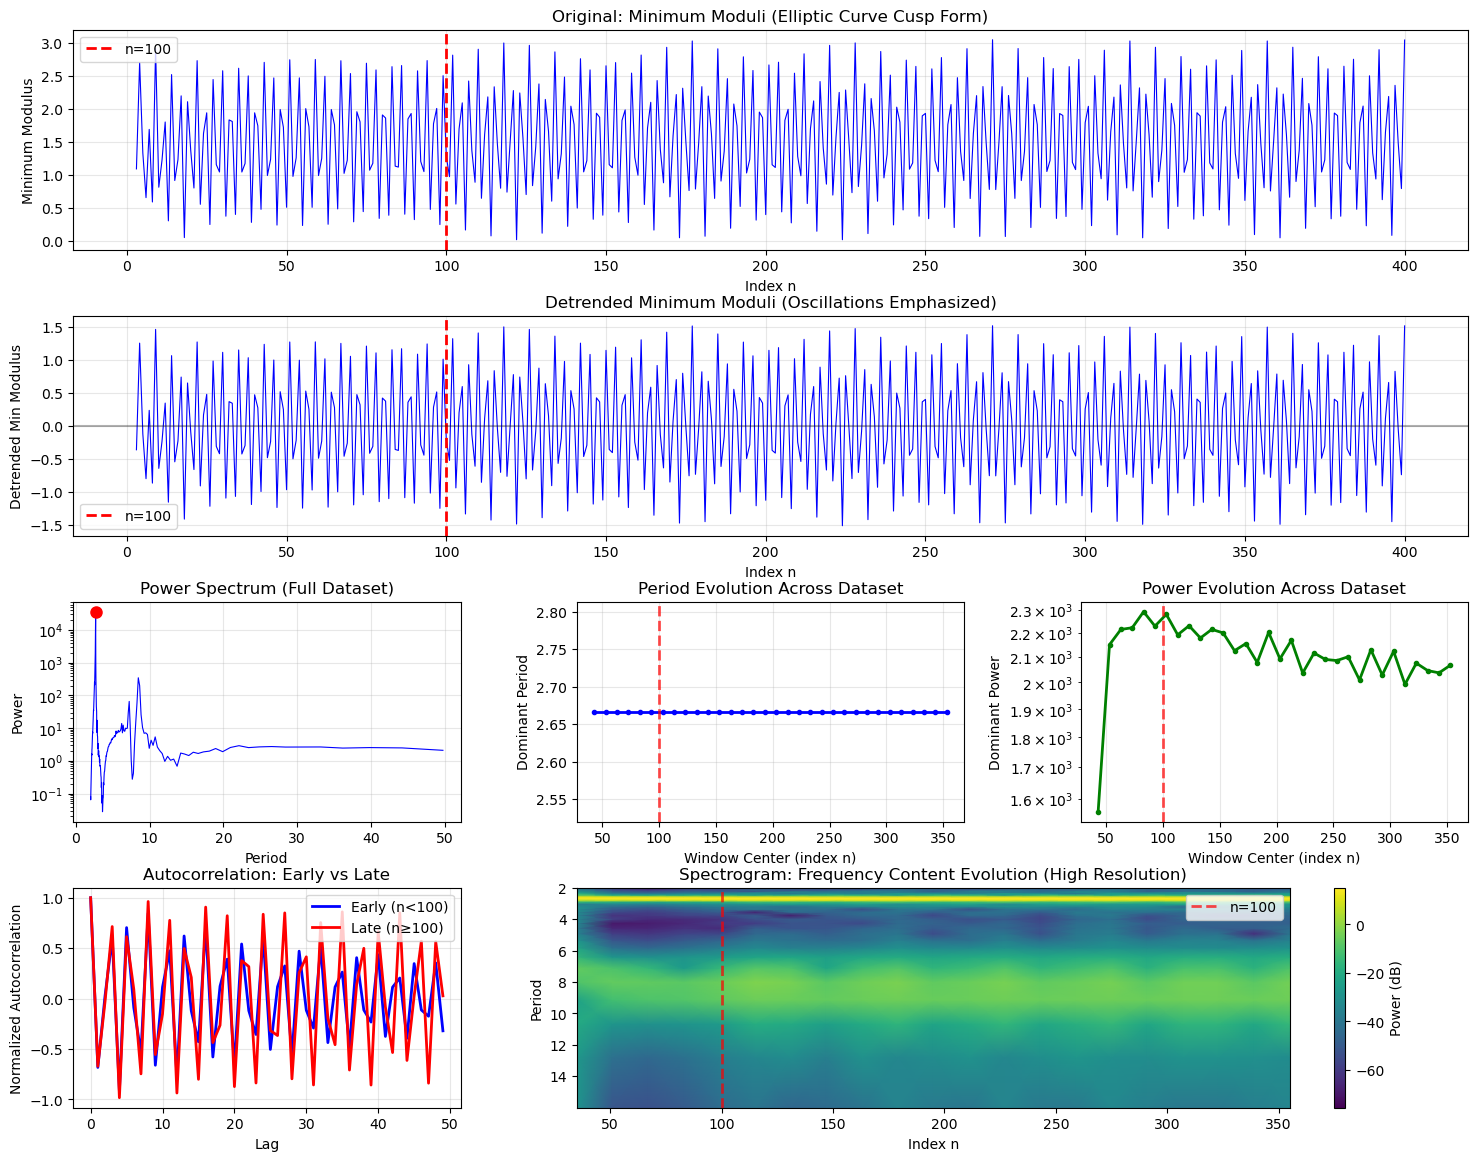

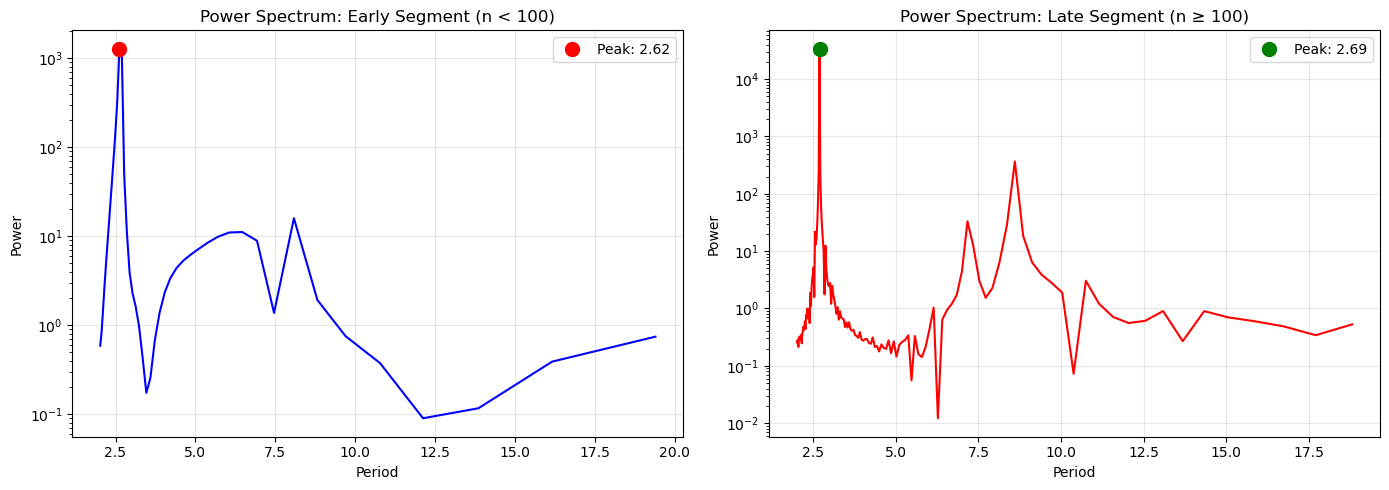


SUMMARY OF FINDINGS

Full dataset:
  Dominant period: 2.69
  Dominant power: 3.64e+04

Early segment (n < 100):
  Dominant period: 2.62
  Dominant power: 1.27e+03
  Autocorrelation peak at lag: 3

Late segment (n ≥ 100):
  Dominant period: 2.69
  Dominant power: 3.39e+04
  Autocorrelation peak at lag: 3

Period change: 2.62 → 2.69
Ratio (late/early): 1.025

Period variation across sliding windows:
  Mean: 2.67
  Std dev: 0.00
  Coefficient of variation: 0.000
  → Period relatively stable across dataset

Analysis complete!


In [5]:
# ==============================================================================
# COMPREHENSIVE FOURIER ANALYSIS - Elliptic Curve Cusp Form
# This cell performs spectral analysis including time-frequency methods
# to detect periodicities, frequency evolution, and non-stationary behavior
# This is code I requested from Claude to analyze the irregular Moire pattern.<<<<<<<<<<<<<<<<
# ==============================================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import pickle
with open('/Users/barrybrent/data2/run20feb26no16.txt', 'rb') as rfile:
    mins_list = pickle.load(rfile)

# ==============================================================================
# 1. PREPARE THE DATA - Convert from SageMath to Python/NumPy types
# ==============================================================================

# SKIP THE FIRST TWO MEMBERS OF mins_list (if needed)
mins_list_filtered = mins_list[2:]  # Comment out this line to use all data

# Extract the data from mins_list and convert to Python floats
indices = np.array([float(pair[0]) for pair in mins_list_filtered], dtype=np.float64)
min_moduli = np.array([float(pair[1]) for pair in mins_list_filtered], dtype=np.float64)

print(f"Data range: n = {int(indices[0])} to {int(indices[-1])}")
print(f"Number of data points: {len(indices)}")
print(f"Min modulus range: {min_moduli.min():.6f} to {min_moduli.max():.6f}")

# ==============================================================================
# 2. DETRENDING (Important for seeing oscillations)
# ==============================================================================

# Remove polynomial trend (degree 2) from raw minimum moduli
poly_coeffs = np.polyfit(indices, min_moduli, deg=2)
poly_trend = np.polyval(poly_coeffs, indices)
detrended_poly = min_moduli - poly_trend

print(f"\nPolynomial trend coefficients: {poly_coeffs}")
print(f"Detrended data std dev: {np.std(detrended_poly):.4f}")

# ==============================================================================
# 3. STANDARD FOURIER TRANSFORM (Full Dataset)
# ==============================================================================

print("\n" + "="*70)
print("STANDARD FFT ANALYSIS (FULL DATASET)")
print("="*70)

# Use FFT on the detrended minimum moduli
fft_result = np.fft.fft(detrended_poly)
fft_frequencies = np.fft.fftfreq(len(indices), d=1.0)

# Power spectrum (magnitude squared)
power_spectrum = np.abs(fft_result)**2

# Only keep positive frequencies
positive_freq_mask = fft_frequencies > 0
frequencies = fft_frequencies[positive_freq_mask]
power = power_spectrum[positive_freq_mask]

# Convert frequency to period
periods = 1.0 / frequencies

# Identify dominant frequencies
peak_indices = signal.find_peaks(power, height=np.max(power)*0.05)[0]
peak_powers = power[peak_indices]
peak_periods = periods[peak_indices]

sorted_indices = np.argsort(peak_powers)[::-1]
top_peaks = sorted_indices[:min(15, len(sorted_indices))]

print(f"{'Rank':<6} {'Period':<12} {'Frequency':<12} {'Power':<15}")
print("-"*70)
for rank, idx in enumerate(top_peaks, 1):
    period = peak_periods[idx]
    freq = frequencies[peak_indices[idx]]
    pwr = peak_powers[idx]
    print(f"{rank:<6} {period:>10.2f}   {freq:>10.6f}   {pwr:>12.2e}")

# ==============================================================================
# 4. SPLIT DATASET ANALYSIS (Before and After n=100)
# ==============================================================================

print("\n" + "="*70)
print("SPLIT DATASET ANALYSIS")
print("="*70)

# Find split point closest to n=100
split_value = 100
split_idx = np.argmin(np.abs(indices - split_value))
actual_split = indices[split_idx]

print(f"Split point: n = {actual_split:.0f} (index {split_idx})")
print(f"Early segment: n = {indices[0]:.0f} to {indices[split_idx-1]:.0f} ({split_idx} points)")
print(f"Late segment: n = {indices[split_idx]:.0f} to {indices[-1]:.0f} ({len(indices)-split_idx} points)")

# Analyze early segment
indices_early = indices[:split_idx]
detrended_early = detrended_poly[:split_idx]

fft_early = np.fft.fft(detrended_early)
freqs_early = np.fft.fftfreq(len(detrended_early))
power_early = np.abs(fft_early)**2

pos_mask_early = freqs_early > 0
periods_early = 1.0 / freqs_early[pos_mask_early]
power_early_pos = power_early[pos_mask_early]

peak_idx_early = np.argmax(power_early_pos)
dominant_period_early = periods_early[peak_idx_early]
dominant_power_early = power_early_pos[peak_idx_early]

# Analyze late segment
indices_late = indices[split_idx:]
detrended_late = detrended_poly[split_idx:]

fft_late = np.fft.fft(detrended_late)
freqs_late = np.fft.fftfreq(len(detrended_late))
power_late = np.abs(fft_late)**2

pos_mask_late = freqs_late > 0
periods_late = 1.0 / freqs_late[pos_mask_late]
power_late_pos = power_late[pos_mask_late]

peak_idx_late = np.argmax(power_late_pos)
dominant_period_late = periods_late[peak_idx_late]
dominant_power_late = power_late_pos[peak_idx_late]

print(f"\nEarly segment (n < {actual_split:.0f}):")
print(f"  Dominant period: {dominant_period_early:.2f}")
print(f"  Dominant power: {dominant_power_early:.2e}")

print(f"\nLate segment (n >= {actual_split:.0f}):")
print(f"  Dominant period: {dominant_period_late:.2f}")
print(f"  Dominant power: {dominant_power_late:.2e}")

print(f"\nPeriod ratio (late/early): {dominant_period_late/dominant_period_early:.3f}")
print(f"Power ratio (late/early): {dominant_power_late/dominant_power_early:.3f}")

# ==============================================================================
# 5. SLIDING WINDOW FFT (Track Frequency Evolution)
# ==============================================================================

print("\n" + "="*70)
print("SLIDING WINDOW FFT (TRACKING FREQUENCY EVOLUTION)")
print("="*70)

window_width = 80
step_size = 10

window_centers = []
dominant_periods_sliding = []
dominant_powers_sliding = []
secondary_periods_sliding = []
secondary_powers_sliding = []

for start_idx in range(0, len(indices) - window_width, step_size):
    end_idx = start_idx + window_width
    
    # Extract window
    window_data = detrended_poly[start_idx:end_idx]
    
    # FFT on window
    fft_win = np.fft.fft(window_data)
    freqs_win = np.fft.fftfreq(len(window_data))
    power_win = np.abs(fft_win)**2
    
    # Find peaks
    pos_mask = freqs_win > 0
    freqs_pos = freqs_win[pos_mask]
    power_pos = power_win[pos_mask]
    periods_pos = 1.0 / freqs_pos
    
    # Sort by power
    sorted_power_idx = np.argsort(power_pos)[::-1]
    
    # Dominant peak
    dominant_period = periods_pos[sorted_power_idx[0]]
    dominant_power = power_pos[sorted_power_idx[0]]
    
    # Secondary peak (if exists)
    if len(sorted_power_idx) > 1:
        secondary_period = periods_pos[sorted_power_idx[1]]
        secondary_power = power_pos[sorted_power_idx[1]]
    else:
        secondary_period = np.nan
        secondary_power = 0
    
    window_centers.append(indices[start_idx + window_width//2])
    dominant_periods_sliding.append(dominant_period)
    dominant_powers_sliding.append(dominant_power)
    secondary_periods_sliding.append(secondary_period)
    secondary_powers_sliding.append(secondary_power)

print(f"Number of windows analyzed: {len(window_centers)}")
print(f"Window width: {window_width} points")
print(f"Step size: {step_size} points")

# ==============================================================================
# 6. AUTOCORRELATION ANALYSIS (Compare Early vs Late)
# ==============================================================================

print("\n" + "="*70)
print("AUTOCORRELATION ANALYSIS")
print("="*70)

# Autocorrelation for early segment
autocorr_early = signal.correlate(detrended_early, detrended_early, mode='full')
autocorr_early = autocorr_early / autocorr_early.max()  # Normalize
lags_early = np.arange(-len(detrended_early)+1, len(detrended_early))

# Autocorrelation for late segment
autocorr_late = signal.correlate(detrended_late, detrended_late, mode='full')
autocorr_late = autocorr_late / autocorr_late.max()  # Normalize
lags_late = np.arange(-len(detrended_late)+1, len(detrended_late))

# Find first peak in autocorrelation (after lag=0) to estimate period
def find_first_peak(autocorr, lags, min_lag=1):
    """Find the first significant peak in autocorrelation after min_lag"""
    half_idx = len(lags) // 2
    positive_lags = lags[half_idx+min_lag:]
    positive_autocorr = autocorr[half_idx+min_lag:]
    peaks, _ = signal.find_peaks(positive_autocorr, height=0.3)
    if len(peaks) > 0:
        return positive_lags[peaks[0]]
    return None

peak_lag_early = find_first_peak(autocorr_early, lags_early)
peak_lag_late = find_first_peak(autocorr_late, lags_late)

if peak_lag_early is not None:
    print(f"Early segment: First autocorrelation peak at lag {peak_lag_early}")
if peak_lag_late is not None:
    print(f"Late segment: First autocorrelation peak at lag {peak_lag_late}")

# ==============================================================================
# 7. VISUALIZATIONS
# ==============================================================================

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# Plot 1: Original data with split line
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(indices, min_moduli, 'b-', linewidth=0.8)
ax1.axvline(x=actual_split, color='r', linestyle='--', linewidth=2, label=f'n={actual_split:.0f}')
ax1.set_xlabel('Index n')
ax1.set_ylabel('Minimum Modulus')
ax1.set_title('Original: Minimum Moduli (Elliptic Curve Cusp Form)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Detrended data with split line
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(indices, detrended_poly, 'b-', linewidth=0.8)
ax2.axvline(x=actual_split, color='r', linestyle='--', linewidth=2, label=f'n={actual_split:.0f}')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_xlabel('Index n')
ax2.set_ylabel('Detrended Min Modulus')
ax2.set_title('Detrended Minimum Moduli (Oscillations Emphasized)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Power spectrum (full dataset)
ax3 = fig.add_subplot(gs[2, 0])
max_period_plot = min(50, len(indices) / 2)
period_mask = periods <= max_period_plot
ax3.semilogy(periods[period_mask], power[period_mask], 'b-', linewidth=0.8)
for idx in top_peaks[:5]:
    if peak_periods[idx] <= max_period_plot:
        ax3.semilogy(peak_periods[idx], peak_powers[idx], 'ro', markersize=8)
ax3.set_xlabel('Period')
ax3.set_ylabel('Power')
ax3.set_title('Power Spectrum (Full Dataset)')
ax3.grid(True, alpha=0.3)

# Plot 4: Sliding window - dominant period vs position
ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(window_centers, dominant_periods_sliding, 'b-', linewidth=2, marker='o', markersize=3)
ax4.axvline(x=actual_split, color='r', linestyle='--', linewidth=2, alpha=0.7)
ax4.set_xlabel('Window Center (index n)')
ax4.set_ylabel('Dominant Period')
ax4.set_title('Period Evolution Across Dataset')
ax4.grid(True, alpha=0.3)

# Plot 5: Sliding window - power vs position
ax5 = fig.add_subplot(gs[2, 2])
ax5.semilogy(window_centers, dominant_powers_sliding, 'g-', linewidth=2, marker='o', markersize=3)
ax5.axvline(x=actual_split, color='r', linestyle='--', linewidth=2, alpha=0.7)
ax5.set_xlabel('Window Center (index n)')
ax5.set_ylabel('Dominant Power')
ax5.set_title('Power Evolution Across Dataset')
ax5.grid(True, alpha=0.3)

# Plot 6: Autocorrelation comparison (early vs late)
ax6 = fig.add_subplot(gs[3, 0])
max_lag_plot = min(50, len(lags_early)//2)
half_idx_early = len(lags_early) // 2
half_idx_late = len(lags_late) // 2
ax6.plot(lags_early[half_idx_early:half_idx_early+max_lag_plot], 
         autocorr_early[half_idx_early:half_idx_early+max_lag_plot],
         'b-', linewidth=2, label=f'Early (n<{actual_split:.0f})')
ax6.plot(lags_late[half_idx_late:half_idx_late+max_lag_plot], 
         autocorr_late[half_idx_late:half_idx_late+max_lag_plot],
         'r-', linewidth=2, label=f'Late (n≥{actual_split:.0f})')
ax6.set_xlabel('Lag')
ax6.set_ylabel('Normalized Autocorrelation')
ax6.set_title('Autocorrelation: Early vs Late')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Plot 7: Improved Spectrogram (higher time resolution)
ax7 = fig.add_subplot(gs[3, 1:])
window_size = 64  # Smaller window for better time resolution
overlap = int(window_size * 0.75)  # 75% overlap
f_spec, t_spec, Sxx = signal.spectrogram(detrended_poly, fs=1.0, 
                                          nperseg=window_size, 
                                          noverlap=overlap,
                                          window='hann')
period_spec = 1.0 / (f_spec + 1e-10)
period_spec = period_spec[1:]
Sxx = Sxx[1:, :]

# Only plot periods up to 20
period_plot_max = 20
period_plot_mask = period_spec <= period_plot_max
period_spec_plot = period_spec[period_plot_mask]
Sxx_plot = Sxx[period_plot_mask, :]

im = ax7.pcolormesh(indices[0] + t_spec, period_spec_plot, 
                    10*np.log10(Sxx_plot + 1e-10),
                    shading='gouraud', cmap='viridis')
ax7.axvline(x=actual_split, color='r', linestyle='--', linewidth=2, alpha=0.7, label=f'n={actual_split:.0f}')
ax7.set_xlabel('Index n')
ax7.set_ylabel('Period')
ax7.set_title('Spectrogram: Frequency Content Evolution (High Resolution)')
ax7.invert_yaxis()
ax7.legend(loc='upper right')
plt.colorbar(im, ax=ax7, label='Power (dB)')

plt.show()

# ==============================================================================
# 8. POWER SPECTRUM COMPARISON (Early vs Late)
# ==============================================================================

fig2, axes = plt.subplots(1, 2, figsize=(14, 5))

# Early segment power spectrum
max_period_plot = 20
period_mask_early = periods_early <= max_period_plot
axes[0].semilogy(periods_early[period_mask_early], power_early_pos[period_mask_early], 
                 'b-', linewidth=1.5)
axes[0].semilogy(dominant_period_early, dominant_power_early, 'ro', markersize=10,
                label=f'Peak: {dominant_period_early:.2f}')
axes[0].set_xlabel('Period')
axes[0].set_ylabel('Power')
axes[0].set_title(f'Power Spectrum: Early Segment (n < {actual_split:.0f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Late segment power spectrum
period_mask_late = periods_late <= max_period_plot
axes[1].semilogy(periods_late[period_mask_late], power_late_pos[period_mask_late], 
                 'r-', linewidth=1.5)
axes[1].semilogy(dominant_period_late, dominant_power_late, 'go', markersize=10,
                label=f'Peak: {dominant_period_late:.2f}')
axes[1].set_xlabel('Period')
axes[1].set_ylabel('Power')
axes[1].set_title(f'Power Spectrum: Late Segment (n ≥ {actual_split:.0f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# 9. SUMMARY STATISTICS
# ==============================================================================

print("\n" + "="*70)
print("SUMMARY OF FINDINGS")
print("="*70)

print(f"\nFull dataset:")
print(f"  Dominant period: {peak_periods[top_peaks[0]]:.2f}")
print(f"  Dominant power: {peak_powers[top_peaks[0]]:.2e}")

print(f"\nEarly segment (n < {actual_split:.0f}):")
print(f"  Dominant period: {dominant_period_early:.2f}")
print(f"  Dominant power: {dominant_power_early:.2e}")
if peak_lag_early is not None:
    print(f"  Autocorrelation peak at lag: {peak_lag_early}")

print(f"\nLate segment (n ≥ {actual_split:.0f}):")
print(f"  Dominant period: {dominant_period_late:.2f}")
print(f"  Dominant power: {dominant_power_late:.2e}")
if peak_lag_late is not None:
    print(f"  Autocorrelation peak at lag: {peak_lag_late}")

print(f"\nPeriod change: {dominant_period_early:.2f} → {dominant_period_late:.2f}")
print(f"Ratio (late/early): {dominant_period_late/dominant_period_early:.3f}")

# Check if period varies significantly across windows
period_std = np.std(dominant_periods_sliding)
period_mean = np.mean(dominant_periods_sliding)
print(f"\nPeriod variation across sliding windows:")
print(f"  Mean: {period_mean:.2f}")
print(f"  Std dev: {period_std:.2f}")
print(f"  Coefficient of variation: {period_std/period_mean:.3f}")

if period_std/period_mean > 0.1:
    print("  → SIGNIFICANT period variation detected (>10%)")
else:
    print("  → Period relatively stable across dataset")

print("\n" + "="*70)
print("Analysis complete!")
print("="*70)